In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

np.random.seed(42)

%config InlineBackend.figure_format = 'retina'

In [15]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

In [16]:
df['year']=(df['RPT_DT'].str[-4:])
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
0,590402415,08/22/2007,16:00:00,08/22/2007,21:45:00,62.0,08/22/2007,578,HARRASSMENT 2,638.0,...,NaN,40.610586,-73.980682,"(40.610586209, -73.980682338)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,F,2007
1,916707771,08/22/2007,16:00:00,08/22/2007,16:10:00,71.0,08/22/2007,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.662229,-73.934430,"(40.66222879, -73.934429999)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,F,2007
2,724044564,08/22/2007,16:00:00,NaN,NaN,72.0,08/22/2007,235,DANGEROUS DRUGS,511.0,...,NaN,40.644697,-74.003583,"(40.644697283, -74.003583285)",PATROL BORO BKLYN SOUTH,NaN,NaN,UNKNOWN,E,2007
3,410394691,08/22/2007,16:00:00,08/22/2007,16:05:00,75.0,08/22/2007,109,GRAND LARCENY,419.0,...,NaN,40.664294,-73.886264,"(40.664293755, -73.886264319)",PATROL BORO BKLYN NORTH,NaN,<18,UNKNOWN,F,2007
4,365718279,08/22/2007,16:00:00,NaN,NaN,107.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,40.715144,-73.806594,"(40.715144183, -73.806593786)",PATROL BORO QUEENS SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M,2007
5,853256220,08/22/2007,16:00:00,08/22/2007,17:00:00,40.0,08/22/2007,341,PETIT LARCENY,338.0,...,NaN,40.807779,-73.912262,"(40.807779339, -73.912262462)",PATROL BORO BRONX,NaN,18-24,BLACK,F,2007
6,872541237,08/22/2007,16:00:00,08/22/2007,16:10:00,41.0,08/22/2007,578,HARRASSMENT 2,638.0,...,NaN,40.815636,-73.896931,"(40.815635776, -73.896930554)",PATROL BORO BRONX,NaN,NaN,WHITE HISPANIC,F,2007
7,659715454,08/22/2007,16:00:00,08/22/2007,20:00:00,42.0,08/22/2007,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,40.834280,-73.887455,"(40.834280024, -73.88745537)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F,2007
8,214131394,08/22/2007,16:00:00,08/22/2007,17:35:00,122.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,40.593858,-74.163136,"(40.593857773, -74.163135755)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M,2007
9,449380913,08/22/2007,15:55:00,08/22/2007,15:56:00,111.0,08/22/2007,235,DANGEROUS DRUGS,567.0,...,NaN,40.739755,-73.749968,"(40.739754509, -73.749968116)",PATROL BORO QUEENS NORTH,NaN,NaN,UNKNOWN,E,2007


In [19]:
# df['year']=df['year'].replace('1015','2015')
# df['year']=df['year'].replace('1026','1926')
# df['year']=df['year'].replace('1027','1927')
#df['int_year'] = pd.to_numeric(df['year'])
df.groupby('year').count().iloc[:,0]

year
2006    529789
2007    536328
2008    529968
2009    512981
2010    509731
2011    498580
2012    504352
2013    497256
2014    491334
2015    478590
2016    478908
2017    468988
Name: CMPLNT_NUM, dtype: int64

In [42]:
df_2018 = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')
df_2018['year']='2018'
len(df_2018)

464065

In [43]:
df_tot = df.append(df_2018, sort=False)

In [25]:
df_tot

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
0,590402415,08/22/2007,16:00:00,08/22/2007,21:45:00,62.0,08/22/2007,578,HARRASSMENT 2,638.0,...,NaN,40.610586,-73.980682,"(40.610586209, -73.980682338)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,F,2007
1,916707771,08/22/2007,16:00:00,08/22/2007,16:10:00,71.0,08/22/2007,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.662229,-73.934430,"(40.66222879, -73.934429999)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,F,2007
2,724044564,08/22/2007,16:00:00,NaN,NaN,72.0,08/22/2007,235,DANGEROUS DRUGS,511.0,...,NaN,40.644697,-74.003583,"(40.644697283, -74.003583285)",PATROL BORO BKLYN SOUTH,NaN,NaN,UNKNOWN,E,2007
3,410394691,08/22/2007,16:00:00,08/22/2007,16:05:00,75.0,08/22/2007,109,GRAND LARCENY,419.0,...,NaN,40.664294,-73.886264,"(40.664293755, -73.886264319)",PATROL BORO BKLYN NORTH,NaN,<18,UNKNOWN,F,2007
4,365718279,08/22/2007,16:00:00,NaN,NaN,107.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,40.715144,-73.806594,"(40.715144183, -73.806593786)",PATROL BORO QUEENS SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M,2007
5,853256220,08/22/2007,16:00:00,08/22/2007,17:00:00,40.0,08/22/2007,341,PETIT LARCENY,338.0,...,NaN,40.807779,-73.912262,"(40.807779339, -73.912262462)",PATROL BORO BRONX,NaN,18-24,BLACK,F,2007
6,872541237,08/22/2007,16:00:00,08/22/2007,16:10:00,41.0,08/22/2007,578,HARRASSMENT 2,638.0,...,NaN,40.815636,-73.896931,"(40.815635776, -73.896930554)",PATROL BORO BRONX,NaN,NaN,WHITE HISPANIC,F,2007
7,659715454,08/22/2007,16:00:00,08/22/2007,20:00:00,42.0,08/22/2007,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,40.834280,-73.887455,"(40.834280024, -73.88745537)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F,2007
8,214131394,08/22/2007,16:00:00,08/22/2007,17:35:00,122.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,40.593858,-74.163136,"(40.593857773, -74.163135755)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M,2007
9,449380913,08/22/2007,15:55:00,08/22/2007,15:56:00,111.0,08/22/2007,235,DANGEROUS DRUGS,567.0,...,NaN,40.739755,-73.749968,"(40.739754509, -73.749968116)",PATROL BORO QUEENS NORTH,NaN,NaN,UNKNOWN,E,2007


In [44]:
df_tot.groupby('year').count().iloc[:,0]

year
2006    529789
2007    536328
2008    529968
2009    512981
2010    509731
2011    498580
2012    504352
2013    497256
2014    491334
2015    478590
2016    478908
2017    468988
2018    464065
Name: CMPLNT_NUM, dtype: int64

In [45]:
df_tot.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year'],
      dtype='object')

In [46]:
df_tot['OFNS_DESC'].unique()

array(['HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES', 'DANGEROUS DRUGS',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF', 'PETIT LARCENY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'DANGEROUS WEAPONS',
       'MISCELLANEOUS PENAL LAW', 'FRAUDS', 'ROBBERY', 'FELONY ASSAULT',
       'CRIMINAL TRESPASS', 'ADMINISTRATIVE CODE', 'FORGERY',
       'SEX CRIMES', 'VEHICLE AND TRAFFIC LAWS',
       'OTHER STATE LAWS (NON PENAL LA', "BURGLAR'S TOOLS",
       'POSSESSION OF STOLEN PROPERTY', 'OFFENSES AGAINST PUBLIC ADMINI',
       'BURGLARY', 'UNAUTHORIZED USE OF A VEHICLE',
       'OFFENSES INVOLVING FRAUD', 'GRAND LARCENY OF MOTOR VEHICLE',
       'OFFENSES AGAINST THE PERSON', 'KIDNAPPING & RELATED OFFENSES',
       'THEFT-FRAUD', 'ESCAPE 3', 'OFFENSES RELATED TO CHILDREN',
       'OTHER OFFENSES RELATED TO THEF', 'INTOXICATED & IMPAIRED DRIVING',
       nan, 'RAPE', 'GAMBLING', 'NYS LAWS-UNCLASSIFIED FELONY',
       'FRAUDULENT ACCOSTING', 'CHILD ABANDONMENT/NON SUPPORT', 'ARSON',
 

In [47]:
df_tot.sample(10000)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
889482,514391683,12/16/2009,08:15:00,12/16/2009,08:20:00,111.0,12/16/2009,105,ROBBERY,397.0,...,NaN,40.753491,-73.779199,"(40.753491392, -73.779199307)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE,F,2009
803658,232517194,02/16/2008,20:30:00,02/17/2008,08:00:00,70.0,02/17/2008,341,PETIT LARCENY,349.0,...,NaN,40.652371,-73.960917,"(40.652370605, -73.960917385)",PATROL BORO BKLYN SOUTH,NaN,25-44,WHITE,F,2008
5781380,770593024,02/13/2006,05:00:00,02/13/2006,15:00:00,40.0,02/13/2006,341,PETIT LARCENY,357.0,...,NaN,40.816468,-73.922172,"(40.816468014, -73.922171663)",PATROL BORO BRONX,NaN,25-44,WHITE,M,2006
5740575,748437846,03/15/2006,11:20:00,NaN,NaN,60.0,03/15/2006,578,HARRASSMENT 2,638.0,...,NaN,40.579180,-73.958271,"(40.579179751, -73.958271063)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,M,2006
397628,611395156,02/24/2018,03:00:00,02/24/2018,05:00:00,42.0,02/24/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,40.835353,-73.884750,"(40.83535328100004, -73.88475043899997)",PATROL BORO BRONX,NaN,45-64,BLACK HISPANIC,M,2018
5421301,821127351,10/16/2006,10:30:00,NaN,NaN,60.0,10/16/2006,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.584482,-73.972604,"(40.584481533, -73.972603807)",PATROL BORO BKLYN SOUTH,NaN,25-44,WHITE,M,2006
3174956,649607931,06/16/2013,10:10:00,06/16/2013,10:15:00,5.0,06/16/2013,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,40.721315,-73.993728,"(40.721314749, -73.99372782)",PATROL BORO MAN SOUTH,NaN,NaN,UNKNOWN,E,2013
984473,203010596,10/09/2009,17:29:00,10/09/2009,17:45:00,107.0,10/09/2009,106,FELONY ASSAULT,106.0,...,NaN,40.705132,-73.811907,"(40.705131833, -73.811906707)",PATROL BORO QUEENS SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,2009
4757216,705878089,03/10/2016,19:45:00,03/10/2016,20:00:00,60.0,03/10/2016,106,FELONY ASSAULT,109.0,...,NaN,40.585661,-73.985132,"(40.585661356, -73.985132291)",PATROL BORO BKLYN SOUTH,NaN,25-44,WHITE,M,2016
2464426,863281236,11/03/2012,18:30:00,NaN,NaN,47.0,11/03/2012,126,MISCELLANEOUS PENAL LAW,198.0,...,NaN,40.872162,-73.866141,"(40.87216165, -73.866141235)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F,2012


In [49]:
cr18 = df_tot['year']=='2018'
cr17 = df_tot['year']=='2017'
cr16 = df_tot['year']=='2016'
cr15 = df_tot['year']=='2015'
cr14 = df_tot['year']=='2014'
cr13 = df_tot['year']=='2013'
cr12 = df_tot['year']=='2012'
cr11 = df_tot['year']=='2011'
cr10 = df_tot['year']=='2010'
cr09 = df_tot['year']=='2009'
cr08 = df_tot['year']=='2008'
cr07 = df_tot['year']=='2007'
cr06 = df_tot['year']=='2006'

In [56]:
df_18=df_tot[cr18]
df_18['month']=(df_18['RPT_DT'].str[0:2])
df_18.groupby('month').count().iloc[:,0]

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


month
01    37247
02    34878
03    37513
04    37820
05    41639
06    39868
07    41804
08    41806
09    39192
10    39549
11    36260
12    36489
Name: CMPLNT_NUM, dtype: int64

In [57]:
df_17=df_tot[cr17]
df_17['month']=(df_17['RPT_DT'].str[0:2])
df_16=df_tot[cr16]
df_16['month']=(df_16['RPT_DT'].str[0:2])
df_15=df_tot[cr15]
df_15['month']=(df_15['RPT_DT'].str[0:2])
df_14=df_tot[cr14]
df_14['month']=(df_14['RPT_DT'].str[0:2])
df_13=df_tot[cr13]
df_13['month']=(df_13['RPT_DT'].str[0:2])
df_12=df_tot[cr12]
df_12['month']=(df_12['RPT_DT'].str[0:2])
df_11=df_tot[cr11]
df_11['month']=(df_11['RPT_DT'].str[0:2])
df_10=df_tot[cr10]
df_10['month']=(df_10['RPT_DT'].str[0:2])
df_09=df_tot[cr09]
df_09['month']=(df_09['RPT_DT'].str[0:2])
df_08=df_tot[cr08]
df_08['month']=(df_08['RPT_DT'].str[0:2])
df_07=df_tot[cr07]
df_07['month']=(df_07['RPT_DT'].str[0:2])
df_06=df_tot[cr06]
df_06['month']=(df_06['RPT_DT'].str[0:2])

/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/jennycho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [67]:
df_18.plot(x='month',y=(df_18['month'].count())

SyntaxError: unexpected EOF while parsing (<ipython-input-67-b1e5a6cec691>, line 1)

In [68]:
df_17.groupby('month').count().iloc[:,0]

month
01    38403
02    33315
03    36663
04    37818
05    41049
06    40295
07    41702
08    42153
09    40361
10    42155
11    38057
12    37017
Name: CMPLNT_NUM, dtype: int64

In [85]:
cr18 = df_18.groupby('month').count().iloc[:,0]
cr17 = df_17.groupby('month').count().iloc[:,0]
cr16 = df_16.groupby('month').count().iloc[:,0]
cr15 = df_15.groupby('month').count().iloc[:,0]
cr14 = df_14.groupby('month').count().iloc[:,0]
cr13 = df_13.groupby('month').count().iloc[:,0]
cr12 = df_12.groupby('month').count().iloc[:,0]
cr11 = df_11.groupby('month').count().iloc[:,0]
cr10 = df_10.groupby('month').count().iloc[:,0]
cr09 = df_09.groupby('month').count().iloc[:,0]
cr08 = df_08.groupby('month').count().iloc[:,0]
cr07 = df_07.groupby('month').count().iloc[:,0]

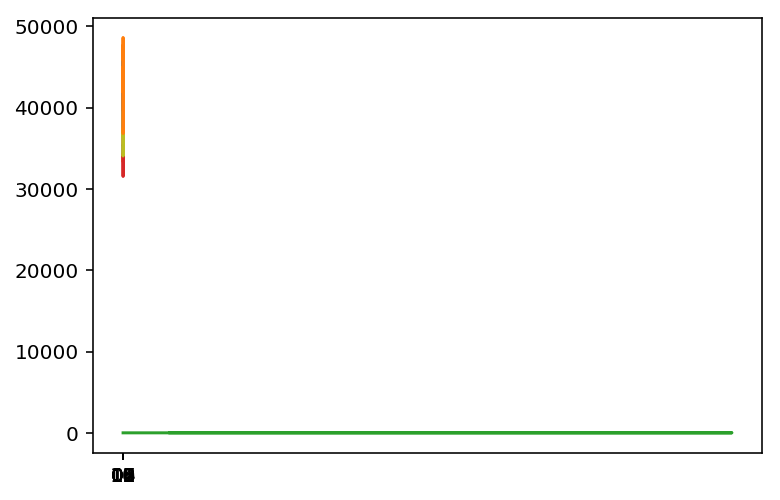

In [86]:
import matplotlib.pyplot as plt
plt.plot(cr18.index,cr18)
plt.plot(cr17.index,cr17)
plt.plot(cr16.index,cr16)
plt.plot(cr15.index,cr15)
plt.plot(cr14.index,cr14)
plt.plot(cr13.index,cr13)
plt.plot(cr12.index,cr12)
plt.plot(cr11.index,cr11)
plt.plot(cr10.index,cr10)
plt.plot(cr09.index,cr09)
plt.plot(cr08.index,cr08)
plt.plot(cr07.index,cr07)
plt.plot(cr06.index,cr06)

In [89]:
sample_set = df_tot.sample(10000)

In [90]:
sample_set.groupby('OFNS_DESC').count().iloc[:,0]

OFNS_DESC
ADMINISTRATIVE CODE                  25
ALCOHOLIC BEVERAGE CONTROL LAW        4
ARSON                                19
ASSAULT 3 & RELATED OFFENSES       1039
BURGLAR'S TOOLS                       7
BURGLARY                            380
CRIMINAL MISCHIEF & RELATED OF      996
CRIMINAL TRESPASS                   123
DANGEROUS DRUGS                     620
DANGEROUS WEAPONS                   252
DISORDERLY CONDUCT                    1
DISRUPTION OF A RELIGIOUS SERV        1
FELONY ASSAULT                      362
FORGERY                              88
FRAUDS                               55
FRAUDULENT ACCOSTING                  5
GAMBLING                              4
GRAND LARCENY                       883
GRAND LARCENY OF MOTOR VEHICLE      183
HARRASSMENT 2                      1226
INTOXICATED & IMPAIRED DRIVING      143
INTOXICATED/IMPAIRED DRIVING          1
KIDNAPPING & RELATED OFFENSES         5
MISCELLANEOUS PENAL LAW             231
MURDER & NON-NEGL. MANSLAUGHTE

In [111]:
df_tot['month']=(df_tot['RPT_DT'].str[:2])
sample_set['month']=(sample_set['RPT_DT'].str[:2])

In [105]:
sample_set.groupby('month').count().iloc[:,0]

month
01    792
02    719
03    843
04    772
05    899
06    822
07    875
08    892
09    854
10    926
11    803
12    803
Name: CMPLNT_NUM, dtype: int64

In [96]:
sample_set

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month
3292828,570816478,03/20/2013,18:30:00,03/20/2013,19:30:00,18.0,03/21/2013,112,THEFT-FRAUD,739.0,...,40.765397,-73.985702,"(40.765397475, -73.985702264)",PATROL BORO MAN SOUTH,NaN,65+,UNKNOWN,M,2013,03
4647337,191513027,06/01/2016,03:06:00,06/01/2016,03:07:00,43.0,06/01/2016,352,CRIMINAL TRESPASS,203.0,...,40.818442,-73.868540,"(40.818442201, -73.868539851)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2016,06
5546059,930526429,07/25/2006,20:30:00,07/26/2006,09:00:00,44.0,07/26/2006,107,BURGLARY,213.0,...,40.844483,-73.914650,"(40.844483488, -73.914650083)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,D,2006,07
2068650,766861646,08/24/2011,07:00:00,08/24/2011,20:00:00,71.0,08/24/2011,107,BURGLARY,221.0,...,40.663460,-73.942762,"(40.663460155, -73.942762342)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F,2011,08
4270917,464667904,03/22/2015,16:00:00,03/22/2015,19:30:00,102.0,03/23/2015,341,PETIT LARCENY,349.0,...,40.696116,-73.858189,"(40.696115712, -73.858189499)",PATROL BORO QUEENS SOUTH,NaN,45-64,WHITE,M,2015,03
2466267,416721785,11/01/2012,19:45:00,11/01/2012,19:50:00,14.0,11/01/2012,109,GRAND LARCENY,438.0,...,40.748767,-73.985320,"(40.748767014, -73.985319659)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE,F,2012,11
494146,610676468,09/14/2008,00:10:00,NaN,NaN,44.0,09/14/2008,235,DANGEROUS DRUGS,567.0,...,40.840984,-73.925974,"(40.840983572, -73.925973925)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,E,2008,09
5118185,816306028,05/27/2017,13:00:00,06/05/2017,18:00:00,18.0,06/06/2017,578,HARRASSMENT 2,638.0,...,40.764669,-73.976952,"(40.7646687, -73.97695189)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,D,2017,06
2019397,486000302,09/29/2011,20:55:00,NaN,NaN,9.0,09/29/2011,106,FELONY ASSAULT,105.0,...,40.724793,-73.976785,"(40.724792933, -73.97678529)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE HISPANIC,F,2011,09
3471704,201421548,10/28/2014,19:40:00,10/28/2014,19:50:00,41.0,10/28/2014,341,PETIT LARCENY,338.0,...,40.825279,-73.897588,"(40.825278564, -73.897587682)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F,2014,10


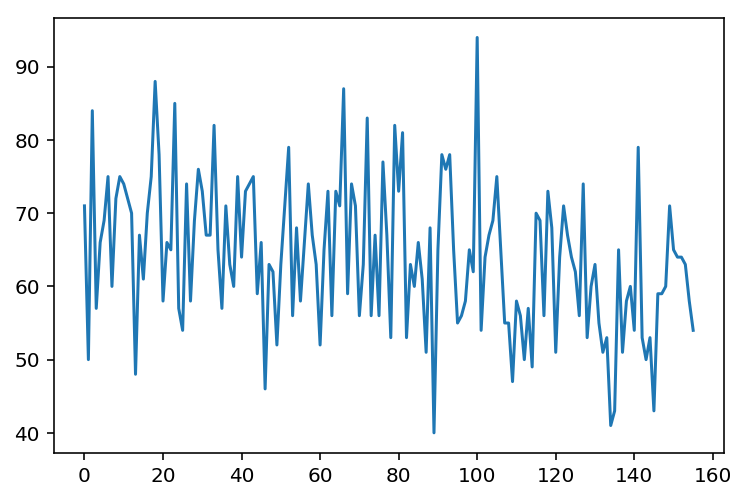

In [117]:
plt.plot( sample_set.groupby(['year','month']).size().values )

AttributeError: 'NoneType' object has no attribute 'update'

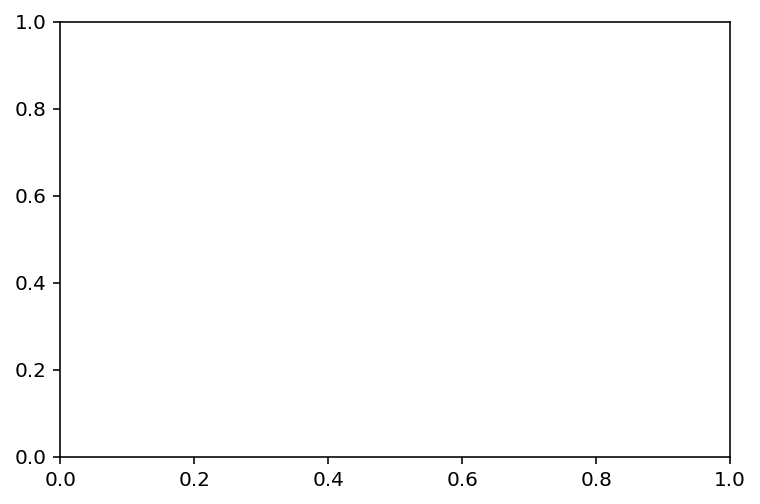

In [113]:
plt.plot(sample_set.index,sample_set)

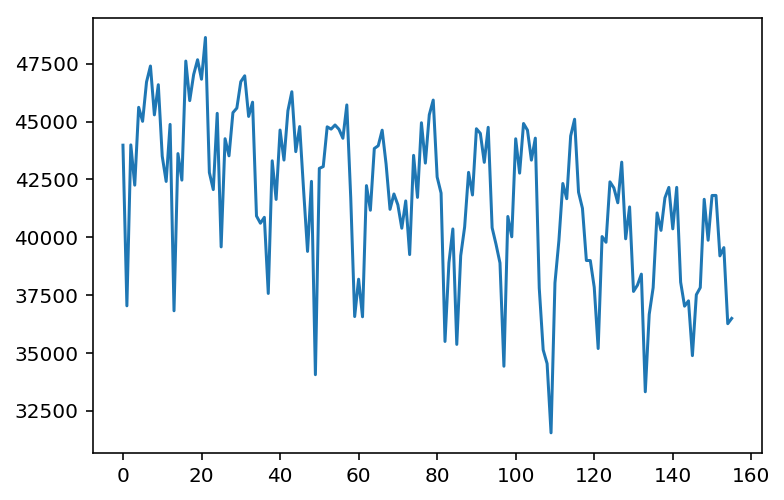

In [118]:
plt.plot(df_tot.groupby(['year','month']).size().values)